In [1]:
from sklearn.datasets import make_classification
from sklearn import linear_model

from sklearn.model_selection import train_test_split

from sklearn.metrics import log_loss

import matplotlib.pyplot as plt

import numpy as np

import pandas as pd

import math
import random

from tqdm import tqdm

### Loading dataset

In [2]:
X, y = make_classification(n_samples=50000, n_features=15, n_informative=10, n_redundant=5,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)

### Splitting data into train and test points

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

### Creating weight vector and intercept term

In [4]:
def Initialize_Weights():
    w = np.zeros_like(X_train[0])
    b = 0
    return w, b

### Sigmoid Function

In [5]:
def sigmoid(z):
    return (1/(1+np.exp(-z)))

### Log Loss Function

In [6]:
def log(value):
    if value == 0:
        return 10**-20
    return math.log10(value)

def calculateErrorForOneValue(aList):
    return (aList[0]*log(aList[1]) + (1-aList[0])*log(1-aList[1]))
    
def LogLoss(aList):
    sumOfAllValues = 0
    OnebyN = -1/len(aList)
    for i in aList:
        sumOfAllValues+=calculateErrorForOneValue(i)
    return (OnebyN * sumOfAllValues)

### Gradient with respect to weight vector and intercept

$w^{(t+1)} ← (1 − \frac{αλ}{N} )w^{(t)} + αx_n(y_n − σ((w^{(t)})^{T} x_n+b^{t}))$

$ db^{(t)} = y_n- σ((w^{(t)})^{T} x_n+b^{t}))$

In [7]:
def Gradient_weight_intercept(x, y, w, b, alpha, eta0, N):
    w_transpose = np.transpose(w)
    error = y-sigmoid(np.dot(w_transpose, x)+b)
    w = np.dot(1-((alpha*eta0)/N), w) + alpha*x*error    
    b = b + (alpha*error)
    return w, b

### Logistic fit function

In [8]:
Epochs = 10

def fit():
    alpha = 0.0001
    eta0 = 0.0001
    w, b = Initialize_Weights()
    LogLoss_train = []
    LogLoss_test = []
    y_pred = []
    
    for i in X_train:
        y_pred.append(sigmoid((np.dot(w,i))+b))
        
    print (LogLoss(list(zip(y_train, y_pred))))
    
    for i in tqdm(range(Epochs)):
        
        y_pred_train = []
        y_pred_test = []
        
        for x, y in list(zip(X_train, y_train)):
            w, b = Gradient_weight_intercept(x, y, w, b, alpha, eta0, len(y_train))

        for i in X_train:
            y_pred_train.append(sigmoid((np.dot(w,i))+b))
        
        for i in X_test:
            y_pred_test.append(sigmoid((np.dot(w,i))+b))
            
        LogLoss_train.append(LogLoss(list(zip(y_train, y_pred_train))))
        LogLoss_test.append(LogLoss(list(zip(y_test, y_pred_test))))
    
    print (LogLoss_train)
    print (LogLoss_test)
    return LogLoss_train, LogLoss_test, w, b

LogLoss_train, LogLoss_test, w, b = fit()

0.3010299956640568


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:11<00:00,  1.18s/it]


[0.1754574844285488, 0.16867157050333254, 0.16639167992463014, 0.16536827537403162, 0.1648570745954716, 0.1645882001292827, 0.16444271323364437, 0.1643626361582704, 0.16431806946667835, 0.1642930737413253]
[0.1759547442321397, 0.16939931358951182, 0.1672059119488591, 0.16621717799334934, 0.16571959463978414, 0.16545557095508606, 0.1653113502079955, 0.1652311685317926, 0.16518605898449001, 0.16516045651849764]


# SKlearn Implementation

In [9]:
clf = linear_model.SGDClassifier(eta0=0.0001, alpha=0.0001, loss='log', random_state=15, penalty='l2', tol=1e-3,
                                 verbose=2, learning_rate='constant')

clf.fit(X=X_train, y=y_train)

-- Epoch 1
Norm: 0.76, NNZs: 15, Bias: -0.314605, T: 37500, Avg. loss: 0.455801
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 0.92, NNZs: 15, Bias: -0.469578, T: 75000, Avg. loss: 0.394737
Total training time: 0.04 seconds.
-- Epoch 3
Norm: 0.98, NNZs: 15, Bias: -0.580452, T: 112500, Avg. loss: 0.385561
Total training time: 0.05 seconds.
-- Epoch 4
Norm: 1.02, NNZs: 15, Bias: -0.660824, T: 150000, Avg. loss: 0.382161
Total training time: 0.07 seconds.
-- Epoch 5
Norm: 1.04, NNZs: 15, Bias: -0.717218, T: 187500, Avg. loss: 0.380474
Total training time: 0.09 seconds.
-- Epoch 6
Norm: 1.06, NNZs: 15, Bias: -0.761816, T: 225000, Avg. loss: 0.379481
Total training time: 0.11 seconds.
-- Epoch 7
Norm: 1.06, NNZs: 15, Bias: -0.793932, T: 262500, Avg. loss: 0.379096
Total training time: 0.13 seconds.
-- Epoch 8
Norm: 1.07, NNZs: 15, Bias: -0.820446, T: 300000, Avg. loss: 0.378826
Total training time: 0.15 seconds.
-- Epoch 9
Norm: 1.07, NNZs: 15, Bias: -0.840093, T: 337500, Avg. loss: 0.

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0001, fit_intercept=True,
       l1_ratio=0.15, learning_rate='constant', loss='log', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=15, shuffle=True, tol=0.001,
       validation_fraction=0.1, verbose=2, warm_start=False)

In [10]:
#print (w, b)
#print (clf.coef_, clf.intercept_)
w-clf.coef_, b-clf.intercept_

(array([[ 8.66526892e-05,  7.17096975e-03, -1.51548550e-03,
         -2.50554953e-03,  1.11991916e-03, -1.74634334e-03,
          3.72810459e-03, -7.48633412e-04,  5.79362170e-03,
         -7.70099691e-03, -4.06863374e-03,  7.33121135e-03,
         -3.50496760e-05,  5.38380705e-03, -9.88236480e-03]]),
 array([-0.00026212]))

### Epoch Number vs. Loss Graph

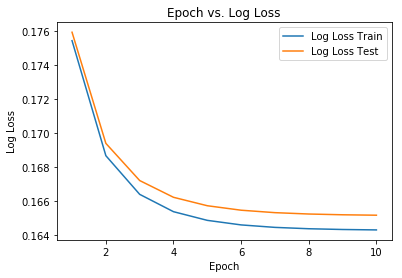

In [11]:
plt.plot(range(1, Epochs+1), LogLoss_train, label='Log Loss Train')
plt.plot(range(1, Epochs+1), LogLoss_test, label='Log Loss Test')

plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Log Loss")
plt.title("Epoch vs. Log Loss")
plt.show()